##  Programmieraufgabe 5

<span style="color:red; font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus, sobald Sie das Notebook neu &ouml;ffnen.</span>

In [3]:
# some setup
%matplotlib inline
import numpy as np 
import numpy.linalg as linalg 
import matplotlib.pyplot as plt 
import random
random.seed("MirkisUsoltsevaLevchenko")

## Newton-Verfahren

(a) Schreiben Sie ein Programm zur iterativen L&ouml;sung nichtlinearer Gleichungssysteme $f(x) = 0$ 
mit Hilfe des Newton-Verfahrens, wobei $f: \mathbb R^2 \to \mathbb R^2$ stetig differenzierbar ist.

Der Aufruf des Programms soll mit
\begin{equation}
\texttt{X = newton}(\texttt{f, df, x0, tol, kmax});
\end{equation}
erfolgen, mit den Eingabeparametern
\begin{align}
\texttt{f} \qquad &\text{Funktion } f(x), \\
\texttt{df} \qquad &\text{Jacobimatrix } Df(x) \text{ der Funktion }f, \\
\texttt{x0} \qquad &\text{Startvektor } x^{(0)} \text{ der Iteration}, \\
\texttt{tol} \qquad &\text{Fehlertoleranz}, \\
\texttt{kmax} \qquad &\text{maximale Anzahl Iterationen}, 
\end{align}
und dem Ausgabeparameter 
\begin{align}
\texttt{X} \qquad &\text{Matrix mit den Iterationen } x^{(0)}, x^{(1)}, \ldots  \text{als Spalten, d.h. mit der Approximation der Nullstelle } x^*\text{ von }f\text{ in der letzten Spalte}. 
\end{align}


Dabei soll die Iteration abgebrochen werden, falls die maximale Anzahl Iterationen $\texttt{kmax}$ &uuml;berschritten wurde oder
\begin{equation}
| f(x^{(k)} ) | + | x^{(k-1)} - x^{(k)}| < \texttt{tol}
\end{equation}
gilt. 


$\textit{Hinweis:}$ Zur L&ouml;sung des linearen Gleichungssystems in jedem Schritt k&ouml;nnen Sie die $\texttt{solve}$-Funktion der $\texttt{linalg}$-Bibliothek benutzen. Die LÃ¶sung von $Ay=b$ wird mit dem Befehl ðš•ðš’ðš—ðšŠðš•ðš.ðšœðš˜ðš•ðšŸðšŽ(ð™°,ðš‹) berechnet.

In [59]:
def newton(f, df, x0, tol, kmax):
    result = np.zeros(shape=(kmax, len(x0)))
    result[0] = x0
    
    i = 0
    while i < kmax:
        result[i+1] = np.add(result[i], linalg.solve(df(result[i]), -f(result[i])))
        if linalg.norm(np.subtract(result[i+1],result[i])) + linalg.norm(f(result[i+1])) < tol:
            return result[:i].transpose()
        i += 1
    
    return result.transpose()

def generate_fade(size, r=1.0, g=0.0, b=0.0):
    colors = np.ndarray(shape=(size, 3))
    for i in range(size):
        colors[i] = [r*(1 - i/size), g*(1 - i/size), b*(1 - i/size)]
    return colors

(b) Gegeben sei das nichtlineare Gleichungssystem
\begin{align}
x_1^2 + x_2^2 - 4 = 0\, , \quad 5x_1^2 + x_2^2 - 7 = 0\, , \quad x_1,x_2 \in \mathbb R\, .
\end{align}
FÃ¼hren Sie das Newton-Verfahren mit $\texttt{tol} = 10^{-8}$, $\texttt{kmax} = 50$ und verschiedenen Startwerten $x^{(0)}$ aus. Plotten Sie jeweils die Trajektorie der Iterationen. Um den Verlauf besser graphisch darzustellen, sollten Sie dabei die GrÃ¶ÃŸe oder die Farbe der Marker in AbhÃ¤ngigkeit von der Zahl der Iterationsschritte variieren.

Betrachten Sie insbesondere die Startwerte $x^{(0)} = (3,3)$ und $x^{(0)} = (3,-3)$.
Was fÃ¤llt Ihnen auf?

starting at:  [3. 3.]
starting at:  [ 3. -3.]


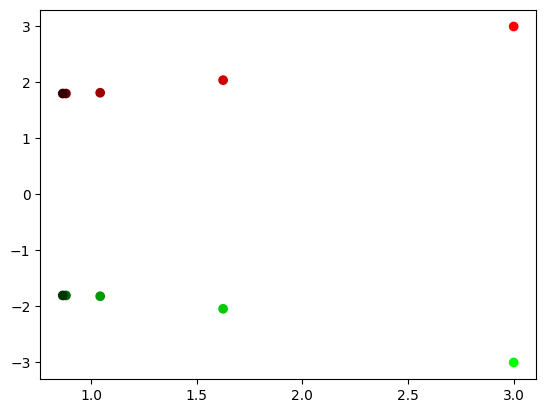

In [60]:
def f(x):
    return np.array([x[0]**2 + x[1]**2 - 4, 5*x[0]**2 + x[1]**2 - 7])
def df(x):
    return np.array([[2*x[0], 2*x[1]], [10*x[0], 2*x[1]]])

tol = 1e-8
kmax = 50

#different starting points
#n = 5
#start_pts = np.random.normal(size=(n, 2))
#for i in start_pts:
#    trajectory = newton(f, df, i, tol, kmax)
#    colors = generate_fade(trajectory[0, :].size)
#    print("starting at: ", trajectory.transpose()[0])
#    plt.scatter(trajectory[0], trajectory[1], c = colors)
#    plt.show()

trajectory = newton(f, df, [3,3], tol, kmax)
colors = generate_fade(trajectory[0, :].size)
print("starting at: ", trajectory.transpose()[0])
plt.scatter(trajectory[0], trajectory[1], c = colors)

trajectory = newton(f, df, [3,-3], tol, kmax)
colors = generate_fade(trajectory[0, :].size, 0.0, 1.0, 0.0)
print("starting at: ", trajectory.transpose()[0])
plt.scatter(trajectory[0], trajectory[1], c = colors)

plt.show()
#Wir beobachten, dass die absolute Werte aequivalent sind (im zweiten Fall sind diese aber negativ)


(c) Finden Sie mit Hilfe des Programms eine Nullstelle zu
\begin{equation}
x_1 + e^{-x_1} + x_2^3 = 0\, , \quad x_1^2 + 2x_1x_2 - x_2^2 + \tan(x_1) = 0\, , \quad x_1,x_2 \in \mathbb R\, .
\end{equation}
W&auml;hlen Sie $\texttt{tol} = 10^{-8}$, $\texttt{kmax} = 100$ und plotten Sie wieder die Trajektorie der Iterationen.

Probieren Sie unterschiedliche Startwerte $x^{(0)}$ aus.

starting at:  [0.30957739 1.07528764]


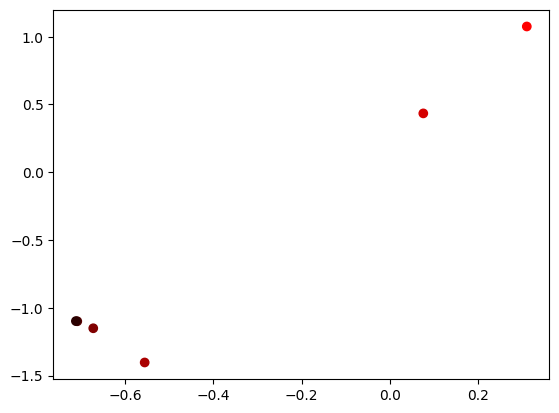

starting at:  [0.34747383 0.18171166]


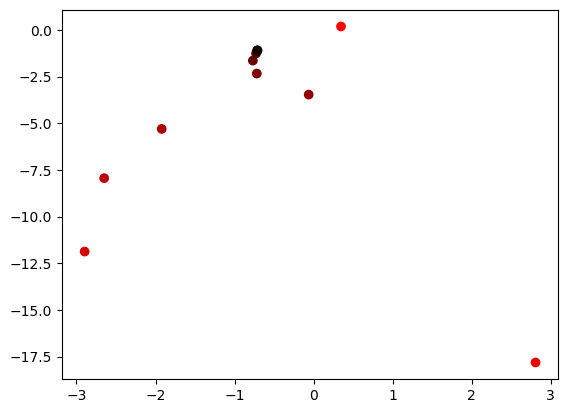

starting at:  [-1.52817049 -1.10633349]


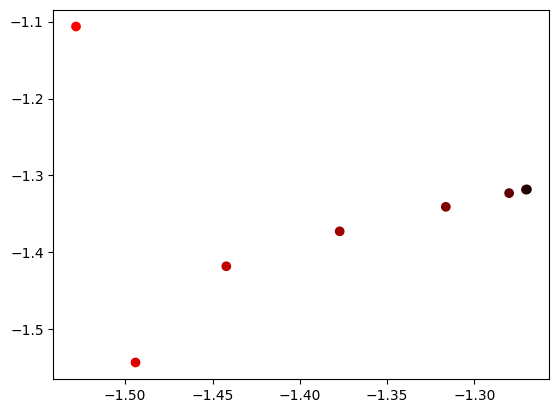

starting at:  [-0.86230291 -0.20938448]


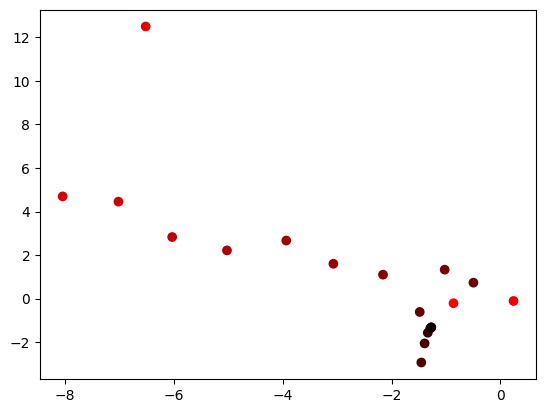

starting at:  [-0.43409161 -0.78394264]


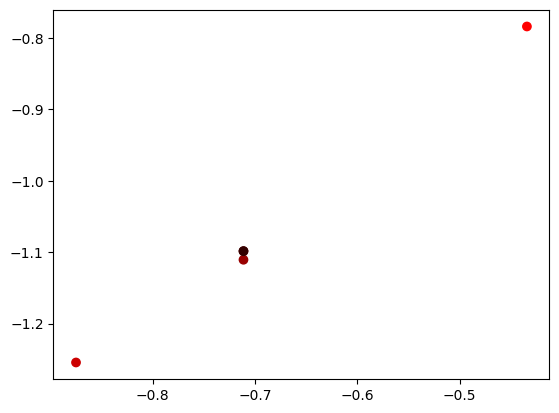

In [63]:
def f(x):
    return np.array([x[0] + np.exp((-1) * x[0]) + x[1]**3, x[0]**2 + 2*x[0]*x[1] - x[1]**2 + np.tan(x[0])])
def df(x):
    return np.array([[1-np.exp((-1) * x[0]), 3*x[1]**2], [2*x[0] + 2*x[1] + (np.cos(x[0]))**(-2), 2*x[0] - 2*x[1]]])

tol = 1e-8
kmax = 100

n = 5
start_pts = np.random.normal(size=(n, 2))
for i in start_pts:
    trajectory = newton(f, df, i, tol, kmax)
    colors = generate_fade(trajectory[0, :].size)
    print("starting at: ", trajectory.transpose()[0])
    plt.scatter(trajectory[0], trajectory[1], c = colors)
    plt.show()